In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
df=yf.download('TSLA',)

[*********************100%***********************]  1 of 1 completed


In [ ]:
returns=np.log(1+df['Adj Close'].pct_change())

In [ ]:
returns

Date
2010-06-29         NaN
2010-06-30   -0.002515
2010-07-01   -0.081723
2010-07-02   -0.134312
2010-07-06   -0.175470
                ...   
2022-10-10   -0.000493
2022-10-11   -0.029402
2022-10-12    0.003412
2022-10-13    0.020413
2022-10-14   -0.078454
Name: Adj Close, Length: 3097, dtype: float64

In [ ]:
mu,sigma=returns.mean(),returns.std()

In [ ]:
mu,sigma

(0.0015689765067908124, 0.0356832560263472)

In [ ]:
#get the simulated returns
sim_ret=np.random.normal(mu,sigma,252)

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...
2022-10-10,223.929993,226.990005,218.360001,222.960007,222.960007,67925000
2022-10-11,220.949997,225.750000,215.000000,216.500000,216.500000,77013200
2022-10-12,215.330002,219.300003,211.509995,217.240005,217.240005,66860700


In [ ]:
#take the last dat price
price=df['Adj Close'].iloc[-1]

In [ ]:
price*(sim_ret+1).cumprod()

array([204.34749946, 199.87581954, 189.8405605 , 187.54016958,
       186.54615635, 191.12723104, 200.52672245, 208.22040831,
       210.33161011, 200.43912533, 199.13112899, 189.17754019,
       198.86143719, 187.89156777, 188.99226802, 184.06101633,
       186.73037404, 183.33330729, 175.06455924, 176.06684848,
       178.72787352, 187.71288456, 191.95777573, 193.68797247,
       195.12357928, 191.51681503, 191.07280366, 186.63441488,
       183.8846616 , 190.80448998, 192.21292946, 181.8421794 ,
       186.89864126, 179.55049066, 183.34993213, 190.1886058 ,
       186.77477618, 189.11871286, 191.70229417, 194.54365695,
       176.03279514, 175.44710267, 178.01886059, 176.84598632,
       182.40524922, 182.77454898, 177.02001704, 172.59258886,
       170.6681697 , 165.81834764, 165.45184407, 159.99041792,
       161.1257002 , 155.92353334, 162.203846  , 170.92674529,
       176.32853068, 173.3248119 , 169.28564481, 173.38325264,
       171.22647376, 165.93347633, 162.82859761, 160.67

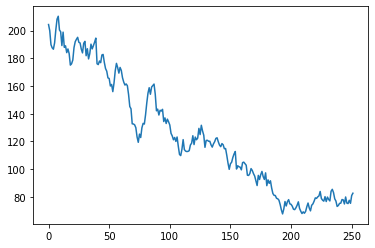

In [ ]:
plt.plot(price*(sim_ret+1).cumprod())

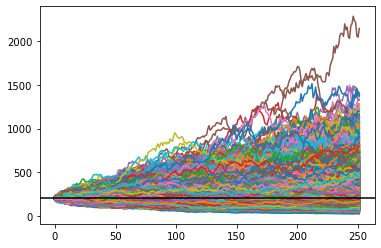

In [ ]:
#now simulate in by iterating
for i in range(5000):
    sim_ret=np.random.normal(mu,sigma,252)
    price*(sim_ret+1).cumprod()
    plt.plot(price*(sim_ret+1).cumprod())
plt.axhline(df['Adj Close'].iloc[-1],c='k')    